In [1]:
# This is the example code link:
# https://algotrading101.com/learn/reddit-wallstreetbets-web-scraping/

# Log Jun. 8: like $CLOV, what about first time mention or threshold frequency?

# Log Jul. 2: ameliorated get_comments() to deal with request.json() method returning blank. Compiled gen_ticker_df 
    # function to generate dataframe from one single discussion thread.
    
# Log Jul. 3: reducing .json() access size from 1000 to 500 seems to solve the blank page problem. 
    # It's likely that time.sleep() doesn't solve the problem. More testing required. 
    # Tested on January threads (good GME age). 
    # Evening log: This is very good. The data collection process is running. I am very satisfied with today's progress. 
    # Update: holy fuck connection got cut. 
    # ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
    # This is easy to solve. Access 'raw' directory, generate date_str of obtained data. 
    # Build list. If new date_str not in list, continue to run code. 
    
# Log Jul. 4: Write script such that function runs only on uncollected dates. If error raised, wait for 10 minutes and run. 
    # The force_collect() function is a success, bypassing reddit limitation. 
    # Now, design function to grab time series data from collected raw data. 
    # Finished time series function. On a side note, I DON'T tihnk it's a good idea to use SARIMA on these data. 
    # The next step, we aim to retrieve the functions that grab stock data. 
    # Want to do a correlation study on the price, volume, and relative indices. 
    
# Log Jul. 6: obtained libraries to pull stock data. 
    # Visualization indicates a close relation between normalized stock volume and normalized WSB count. 
    # Next step: comparison study between mov and dis types. 
    # Also want to do time series regression on count. 
    # Linear regression still needs some precessing and work. Unit root problem, lags, etc. 
    
# Log Jul. 7: don't know what I did. 
    # Thought about comparison study a bit more, and decided to drop it: should the comparison study work, 
    # people would have already traded on it. There shouldn't be any correlation. 
    # Next step: generate returns maybe. If there exist characteristic relation between returns and raw data,
    # that would still be a good discovery. 
    # 09pm: tried some moving average indicators but don't seem to work very well. 
    
# Log Jul. 8: Failed to construct a backtester--maybe it's better to come up with strategy first then backtest. 
    # Realized that what got experimented is hypothesis as follows: 
    # H: does there exist a spike of sentiment (counts) above the long moving average that indicate return spike? 
    # This is observed in case of CLOV and AMC, maybe also in CLNE. 
    # Want to investigate this phenomenon further. 
    # Next step: write an actual strategy first, and test the strategy. 
    
# Log Jul. 9: Constrcted first strategy: "MOV" moving average threshold strategy. Wrote backtesting tool. 
    # Happy about today's progress. 
    # Can work more on the strategy. 
    # AMC has crazy profit when using this strategy with appropriate window. 
    # Next step: write loops and optimization functions for this strategy. 
    # Also, notice that at some point in the near future, need to either update raw data or get more data. 
    # Made a mistake in order numbers. Actually not that good but it's a good start. 
    
# Log Jul. 10: Slightly modified "MOV" moving average threshold strategy to Count Bollinger. 
    # Tested on multiple WSB stocks, and obtained sustained huge gain. 
    # To make sure there's no mistake, please look into this later. 
    # Optimization also needed, but complete the function and visualization first. 
    # Final note today: discovered that the algorithm is doing a lot of shorting. May need to modify the 
    # accounting method such that final balance is calculated right. 
    
    # Fixed accounting method, and some of them are still making visible profit. 
    # Noticed that the portfolio value usually decreases significantly after a spike. Need to figure out how to 
    # Preserve the profit. 
    
# Log Jul. 11: Fixed accounting method such that portfolio value is now correct. 
    # Now, need to make sure that the Bollinger band doesn't include today. 
    # A suggestion: maybe try to preserve the huge spike in mentioning? 
    # Suppose if the count passes 5 standard deviations away, shouldn't the spike be treated different? 
    # We should do optimization tomorrow. Really need to make sure no overfitting is present. 
    
# Log Jul. 14:
    # Note that the spike proposition is essentially having different Bollinger bands at the same time. 
    # It is worth to do optimization first. 
    # Also need to parse the earlier information (learn how to click links.)
    # Noticed a decaying trend in order spikes, due to the setup method of order numbers. 
    # Maybe need to setup a global lower threshold such that "0,0,0, 0.002, 0,0,0.1" doesn't get picked up
    # Parsed information in 2021 January, and also wrote down a better function such that more information 
    # can be downloaded more easily. 
    # Started writing down the Sigmoid transformation idea. Need much more work into this. 
    # Reflected on the strategy, might have made a huge mistake in strategy (Bollinger). Check tomorrow. 
    # Count up implies more momentum right? 
    
# Log Jul. 15: 
    # Sigmoid needs more work. 
    # Fixed the order direction: when count reaches the upper band, should long instead of short. 
    # Note that we need to do something about the Bollinger band on Count: 
    # It makes no sense that the lower bound is negative--then shorting is entirely prevented 
    # since Count is lower bounded. 
    # Natural log transformation? 
    
# Log Jul. 16:
    # Short on the basis of Value instead of Cash? 

# Log Jul. 17: 
    # With sufficiently large short tolerance and long tolerance, the Benchmark line crosses the Value line. 
    # The following setting obtains a higher performance than Benchmark. See picture. 
    # main_StratCountSigmoid(ticker = 'PLTR',
    #                     start = '2021-01-1',
    #                     end = '2021-07-13',
    #                  window = 5,
    #                  std_scalar = 2,
    #                 short_risk_scalar = 1,
    #                  budget = 10000,
    #                         long_tol = 1,
    #                         short_tol = 0.8
    #                         )
    # And this setting: 
    # main_StratCountSigmoid(ticker = 'GME',
    #                     start = '2021-01-1',
    #                     end = '2021-07-13',
    #                  window = 5,
    #                  std_scalar = 1,
    #                 short_risk_scalar = 1,
    #                  budget = 10000,
    #                         long_tol = 1,
    #                         short_tol = 1
    #                         )
    # Did some cool visualization with heatmaps on sharpe ratio. 
    # Need to standardize the scales and render again. It seems like a window of 5 is the best choice. 
    
# Log Jul. 18
    # Before going to bed tonight, run script to generate Sharpe heatmaps with standardized colormap scale. 
    # What is to be done next? 
    # The MA t-Sigmoid strategy is written and evaluated via optimization on str and short ratio. 
    # Maybe long-short tolerance also needs optimization. 
    # That really is about all the parameters inlucded in the strategies written by now. 
    
# Log. Jul. 19
    # Called Tzuo, exchanged ideas on the research. 
    # Focusing on trading strategy and presentation. Try to write something down. 
    # Next step: ISCV. Cross-validation is very important. t-sigmoid strategy works fine, don't change anything. 
    # Side note: revise resume soon? 
    # Important result: parameter optimization depends heavily on the period. Try K-fold split and parameter optimization. 
    # Tzuo: "there's no best way to evaluate a portfolio--it heavily depends on the investor." 
    # Drawdown measure should be added. 

# Log. Jul. 20 
    # Multiple experiments have verified that the parameters are extremely PERIOD-DEPENDENT, STOCK-DEPENDENT
    # Start work on cross-validating. 
    # Plan: For everyday, W days of data is used to form decision rule for today. 
    # Can use N groups of (W days of information + 1 day of action) to test parameters. 
    
    # Meditation notes:
    # Q1: What's the training period? 
    # Result: need warming up period of (W+N) days, and use information from (n+1)~(n+w)th days, trade on (n+w+1)th day. 
    
    # Q2: How to evaluate the result? 
    # Result: for every n groups of (w+1), yield a set of parameters. 
    # Using the set of parameters on n+w+1 th day, obtain a certain measure (MDD, Sharpe, Sortino). 
    # Collect measure data, obtain a list of U-N-W trade measures. 
    
    # Q3: How to choose a set of parameters? 
    # Result: Holding sigmoid transformation constant, there exist 6 parameters: 
        # W -- information window size
        # std_scalar -- scalar on std 
        # short_risk_scalar -- the scalar on downward risk
        # long_tol -- Portfolio proportion tolerance for long orders
        # short_tol -- Portfolio proportion tolerance for short orders
        # (META) N -- training period size. 
    # Maximum may not be the best measure due to randomness. Want structural relations. 
    # Will run a experiment on best of 10 sharpes. 
    # Important question: it's almost impossible to do a 5-param optimization. Does std-short ordinal relation 
    # conserve when changing long-short tolerance? 
        # Answer: experiment on GME 3.1-4.20 shows that changing long-short tolerance does not change 
        # ordinal relationship in choosing the BEST parameters. 
        # This indicates that the optimization for two set of parammeters can be separately done. 
        
    # Evening update: Sketched Cross-validation function. Finished optimization part. 
    # Quite happy about the result of opt function. 
    
# Log. Jul. 21
    # W, N are important meta-parameters too. How should we decide it?
    # Note that while parameters in param dictionary are period specific, 
    # W is deteremine BEFORE generation of parameter dictionary, as it determines the structure of 
    # optimization algorithm design. 
    # Just from intuition, the only fishy part in the algorithm is that 
    # gen_order and backtest are DIRECTLY employed in the training part. Check it. 
    # Also, in order editing part, remember that short_tol and long_tol should be from param_dict 
    # Some performances aren't that good -- is it possible to also consider the global long run MA and 
    # dramatic deviation from it? 
    # Also, another problem to consider: in training section, the (W+N) training window has warm up 
    # -- and thus empty -- periods. This is wasting information. 
    
# Log. Jul. 24
    # Fixing the indexing problem in training period--the length of warming up was unaccounted. Testing if it worked. 
    # Should modify the strategy such that global history out-of-band spikes be prioritized. 
    # Notice that usually, Bollinger band using global MA is a bit tricky, but in the case of Count, it's bounded below by 0.
    

In [187]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from collections import Counter
import numpy as np
from datetime import date, timedelta
from dateutil.parser import parse 
import requests
import os

def grab_html():
    url = 'https://www.reddit.com/r/wallstreetbets/search/?q=flair%3A%22Daily%20Discussion%22&restrict_sr=1&sort=new'
    driver = webdriver.Chrome(executable_path=r'C:\Users\linru\Desktop\Research\chromedriver.exe')
    driver.get(url)
    timeout = 5 
    try:
        element_present = EC.presence_of_element_located((By.ID, 'element_id'))
        WebDriverWait(driver, timeout).until(element_present)
    except TimeoutException:
        print("Timed out waiting for page to load")
    return driver

def grab_link(driver):
    from datetime import date, timedelta
    from dateutil.parser import parse
    yesterday = date.today() - timedelta(days=1)
    links = driver.find_elements_by_xpath('//*[@class="_eYtD2XCVieq6emjKBH3m"]') 
    print(links)
    for a in links:
#         if a.text.startswith('Daily Discussion Thread'):
#             date = "".join(a.text.split(' ')[-3:])
#             parsed = parse(date) 
#             if parse(str(yesterday)) == parsed:
#                 link = a.find_element_by_xpath('../..').get_attribute('href')
#         elif a.text.startswith('Weekend'):
#             weekend_date = a.text.split(' ') 
#             parsed_date = weekend_date[-3] + ' ' + \
#                 weekend_date[-2].split("-")[1] + \
#                 weekend_date[-1] 
#             parsed = parse(parsed_date) 
#             saturday = weekend_date[-3] + ' ' +   \
#             str(int(weekend_date[-2].split('-')[1].replace(',','')) - 1) + ' ' + weekend_date[-1] 
# #         elif 'Moves' in a.text:
# #             date = "".join(a.text.split(' ')[-3:])
# #             parsed = parse(date) 
            
# #         else:
# #             print('nope')
# #             parsed = 0
#             if parse(str(yesterday)) == parsed: # FIXME
#                 link = a.find_element_by_xpath('../..').get_attribute('href')
#             elif parse(str(yesterday)) == parse(str(saturday)):
#                 link = a.find_element_by_xpath('../..').get_attribute('href') 
            
        print(a.text)
    stock_link = link.split('/')[-3]
    driver.close() 
    return stock_link

# Log Jun. 9: Note that the example code only focuses on yesterday, and obtain information solely for yesterday. 
# If we were to conduct static/econometric research on this information, we need all previous discussion threads. 

def grab_commentid_list(stock_link):
    html = requests.get(f'https://api.pushshift.io/reddit/submission/comment_ids/{stock_link}')
    raw_comment_list = html.json()
    return raw_comment_list

def grab_stocklist():
    with open('stockslist.txt', 'r') as w:
        stocks = w.readlines()
        stocks_list = []
        for a in stocks:
            a = a.replace('\n','')
            stocks_list.append(a)
    return stocks_list 

def get_comments(comment_list):
    html = requests.get(f'https://api.pushshift.io/reddit/comment/search?ids={comment_list}&fields=body&size=1000')
    newcomments = html.json()
    return newcomments

def get_stock_list(newcomments,stocks_list):
    stock_dict = Counter()
    for a in newcomments['data']:
        for ticker in stocks_list:
            if ticker in a['body']:
                stock_dict[ticker]+=1
    return stock_dict

def grab_stock_count(stock_dict,raw_comment_list):
    orig_list = np.array(raw_comment_list['data'])
    comment_list = ",".join(orig_list[0:1000])
    remove_me = slice(0,1000)
    cleaned = np.delete(orig_list, remove_me)
    i = 0
    while i < len(cleaned):
        print(len(cleaned))
        cleaned = np.delete(cleaned, remove_me)
        new_comments_list = ",".join(cleaned[0:1000])
        newcomments = get_comments(new_comments_list)
        get_stock_list(newcomments,stocks_list)
    stock = dict(stock_dict) 
    return stock

# if __name__ == "__main__":
#     driver = grab_html()
#     stock_link = grab_link(driver)
#     raw_comment_list = grab_commentid_list(stock_link) 
#     stockslist = grab_stocklist()
#     print(stockslist)
#     newcomments = get_comments(comment_list)
#     stock_dict = get_stock_list(new_comments,stocks_list)
#     stock = grab_stock_count(stock_dict)

In [ ]:
# MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE 
# MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE 
# MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE 
# MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE 
# MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE MAIN DEPOSITORY HERE 

# PHASE 1 : STATIC RESEARCH
# Algo 0.1 design: 
# 1.0 Use chromedriver to access Reddit WSB search engine. 
# 1.1 Figure out how to scroll all the way down to load all threads. 
# 2.0 Get link from EVERY "Daily Discussion Threads". Store them. 
# 3.0 For each discussion threads, scrap comments. Store comments. 
# 4.0 Analyzing comments. Store result separately for each discussion thread. 
# 5.0 Combine discussion thread analysis to obtain total file. 

# driver = grab_html()
# stock_link = grab_link(driver)
# raw_comment_list = grab_commentid_list(stock_link) 
# stockslist = grab_stocklist()
# newcomments = get_comments(comment_list)
# stock_dict = get_stock_list(new_comments,stocks_list)
# stock = grab_stock_count(stock_dict)

from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from collections import Counter
import numpy as np
from datetime import date, timedelta
from dateutil.parser import parse 
import requests
import time
import re
import sys
import seaborn as sns
import pandas as pd
import os
import datetime
from pandas_datareader import data
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

def grab_html_1():
    path = os.getcwd().replace('code','raw')
    url = 'https://www.reddit.com/r/wallstreetbets/search/?q=flair%3A%22Daily%20Discussion%22&restrict_sr=1&sort=new'
#     driver = webdriver.Chrome(executable_path=r'C:\Users\linru\Desktop\Research\chromedriver.exe')
    driver = webdriver.Chrome(executable_path='\\'.join([path, 'chromedriver.exe']))
    driver.get(url)
#     timeout = 5 
    SCROLL_PAUSE_TIME = 2
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
#     try:
#         element_present = EC.presence_of_element_located((By.ID, 'element_id'))
#         WebDriverWait(driver, timeout).until(element_present)
#     except TimeoutException:
#         print("Timed out waiting for page to load")
    return driver

# grab_html_2  grabs additional data, can input any search question 

def grab_html_2(search, sort = 'new'):
    path = os.getcwd().replace('code','raw')
    q = '%20'.join(search.split())
    url = 'https://www.reddit.com/r/wallstreetbets/search/?q=flair%3A%22Daily%20Discussion%22' + \
            q + '&restrict_sr=1&sort=new'

    driver = webdriver.Chrome(executable_path='\\'.join([path, 'chromedriver.exe']))
    driver.get(url)
#     timeout = 5 
    SCROLL_PAUSE_TIME = 2
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
#     try:
#         element_present = EC.presence_of_element_located((By.ID, 'element_id'))
#         WebDriverWait(driver, timeout).until(element_present)
#     except TimeoutException:
#         print("Timed out waiting for page to load")
    return driver

def WSB_thread_process(th,delim):
    output = th
    for d in str(delim):
        if d in th:
            output = ''.join(output.split(d)[:-1])
    return output.strip() 


# WSB_thread_process(t,'-:')    
    
def grab_link_1(driver):
    from datetime import date, timedelta
    from dateutil.parser import parse
    yesterday = date.today() - timedelta(days=1)
    links = driver.find_elements_by_xpath('//*[@class="_eYtD2XCVieq6emjKBH3m"]') 
    link_dict_d, link_dict_m = {},{}
    for a in links:
        atext = a.get_attribute('textContent').lower()
        atext = WSB_thread_process(atext,':-')
        print(atext)
        # There exist three types of links: "Daily Discussion" and "Moves Tomorrow"
        if 'daily discussion' in atext:
            date = parse("".join(atext.split(' ')[-3:]))
            link = a.find_element_by_xpath('../..').get_attribute('href')
            link_dict_d[date] = link.split('/')[-3]
            
        elif 'moves' in atext:
            date = parse("".join(atext.split(' ')[-3:]))
            link = a.find_element_by_xpath('../..').get_attribute('href')
            link_dict_m[date] = link.split('/')[-3]
            
#         if a.text.startswith('Daily Discussion Thread'):
#             date = "".join(a.text.split(' ')[-3:])
#             parsed = parse(date) 
#             if parse(str(yesterday)) == parsed:
#                 link = a.find_element_by_xpath('../..').get_attribute('href')
#         elif a.text.startswith('Weekend'):
#             weekend_date = a.text.split(' ') 
#             parsed_date = weekend_date[-3] + ' ' + \
#                 weekend_date[-2].split("-")[1] + \
#                 weekend_date[-1] 
#             parsed = parse(parsed_date) 
#             saturday = weekend_date[-3] + ' ' +   \
#             str(int(weekend_date[-2].split('-')[1].replace(',','')) - 1) + ' ' + weekend_date[-1] 
# #         elif 'Moves' in a.text:
# #             date = "".join(a.text.split(' ')[-3:])
# #             parsed = parse(date) 
            
# #         else:
# #             print('nope')
# #             parsed = 0
#             if parse(str(yesterday)) == parsed: # FIXME
#                 link = a.find_element_by_xpath('../..').get_attribute('href')
#             elif parse(str(yesterday)) == parse(str(saturday)):
#                 link = a.find_element_by_xpath('../..').get_attribute('href') 
            
#         print(a.text)
#     stock_link = link.split('/')[-3]
    driver.close() 
    return link_dict_d, link_dict_m

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_link(t):
    tok_list = t.split()
    for i in range(len(tok_list)):
        if 'http' in tok_list[i]:
            tok_list[i] = ''
    out = ' '.join(tok_list)
        
    return out

def comment_process(t):
    # remove emojis
    out = remove_emoji(t)
    
    # remove [] contents
    out = re.sub("[\[].*?[\]]", "", out)
    
    # link recognition and removal 
    out = remove_link(out)
    
    # hard-coding removal
    out.replace('\n',' ')
    unwanted = ['!','?','.']
    for u in unwanted:
        out.replace(u,'')

    # should we drop questions? "Is XXX a buy? "
    # WRITE ME
    
    # More processing added here
    
    return out

# At this step, obtain individual comment_id's. 
# For every comment_id, need to do:
# 1. Grab comment_list. 
# 2. Process individual comments. 
# 3. grab tickers, obtain counts. 
# 4. Do this for all comments. 

def grab_commentid_list(stock_link):
    html = requests.get(f'https://api.pushshift.io/reddit/submission/comment_ids/{stock_link}')
    raw_comment_list = html.json()
    return raw_comment_list

def get_comments_0(comment_list):
    html = requests.get(f'https://api.pushshift.io/reddit/comment/search?ids={comment_list}&fields=body&size=1000')
    # modification jun. 30 : when getting html, wait for 0.5 secs? 
    newcomments = None
    timeout = 20
    timesleep = 0.5
    while newcomments is None and timeout > 0: 
        try: 
            newcomments = html.json()
        except:
            time.sleep(timesleep)
            timesleep += 0.5
            timeout -= 1
            pass 
    return newcomments 

def get_comments_1(comment_list):
    html = requests.get(f'https://api.pushshift.io/reddit/comment/search?ids={comment_list}&fields=body&size=500')
    # modification jun. 30 : when getting html, wait for 0.5 secs? 
    newcomments = None
    timeout = 20
    timesleep = 0.5
    while newcomments is None and timeout > 0: 
        try: 
            newcomments = html.json()
        except:
            time.sleep(timesleep)
            timesleep += 0.5
            timeout -= 1
            pass 
    return newcomments 

def grab_stocklist():
    path = os.getcwd().replace('code','raw')
    with open('\\'.join([path,'stockslist.txt']), 'r') as w:
        stocks = w.readlines()
        stocks_list = []
        for a in stocks:
            a = a.replace('\n',' ').strip()
            stocks_list.append(a)
    return stocks_list 

def get_stock_list_00(newcomments,stocks_list,stock_dict):
    for a in newcomments['data']:
        for ticker in stocks_list:
            if ticker in a['body']:
                stock_dict[ticker]+=1
    return stock_dict

def get_stock_list_01(newcomments,stocks_list, stock_dict):
#     stock_dict = Counter()
    for a in newcomments['data']:
        for ticker in stocks_list:
            comment_str = a['body'].lower()
            cleaned = comment_str
            if ticker.lower() in cleaned:
                stock_dict[ticker]+=1
    return stock_dict

def get_stock_list_11(newcomments,stocks_list, stock_dict):
#     stock_dict = Counter()
    # a['body'] is the comment string. Process it here. 
    for a in newcomments['data']:
        for ticker in stocks_list:
            comment_str = a['body'].lower()
            cleaned = comment_process(comment_str).strip()+' '
            if ticker.lower()+' ' in cleaned:
                stock_dict[ticker]+=1
    return stock_dict

def gen_ticker_df(thread_link, ticker_length):
    no_data = True
    raw_comment_list = grab_commentid_list(thread_link)
    stocks_list = grab_stocklist()
    orig_list = np.array(raw_comment_list['data'])
    remove_me = slice(0,500)
    cleaned = np.delete(orig_list, remove_me)
    stock_dict = Counter()
    while 0 < len(cleaned):
        print(len(cleaned))
        cleaned = np.delete(cleaned, remove_me)
        print(1)
        new_comments_list = ",".join(cleaned[0:500])
        print(2)
        newcomments = get_comments_1(new_comments_list)
        print(3)
        stock_dict = get_stock_list_00(newcomments,stocks_list, stock_dict)
        print(4)
    stock = dict(stock_dict)
    stockdf = pd.DataFrame({'Tickers':stock.keys(),'Count':stock.values()})
    ticker_len_filt = stockdf.loc[:,'Tickers'].apply(lambda x: len(x)>=ticker_length)
    stock_df = stockdf[ticker_len_filt]
    
    if not stock_df.empty:
        stock_df = stock_df.sort_values(by = 'Count',ascending=False)
        no_data = False
    
    return stock_df, no_data

def collect():
    data_path = os.getcwd().replace('code','raw')+'\\collect\\mov'
    filled_dates = [f.split('_')[0] for f in os.listdir(data_path) if '2021' in f]
    print('Checked directory.')
    print(filled_dates)
    for day in m.keys():
        date_str = '-'.join([str(day.year),str(day.month),str(day.day)])
        if date_str not in filled_dates: 
            thread_id = m[day]
            df, no_data = gen_ticker_df(thread_id, 3)

            if no_data == False: 
                filename = '_'.join([date_str,'mov',thread_id])+'.csv'
                df.to_csv('\\'.join([data_path,filename]))
            print('Date: ',date_str,'; ','Thread ID: ', thread_id, ' Done.',sep='')
            if no_data == True: 
                print('This one has empty data.')
    return

def force_collect():
    try:
        collect()
    except:
        time.sleep(600)
        collect()  
    return

def get_ticker_ts(ticker, kind = 'dis'):
    if kind == 'dis':
        path = '\\'.join([os.getcwd().replace('code','raw'),
                         'collect',
                         'dis'])
    elif kind == 'mov':
        path = '\\'.join([os.getcwd().replace('code','raw'),
                         'collect',
                         'mov'])        
    # build list of raw data.
    date_col = []
    count_col = []
    for filename in os.listdir(path): 
        if '.csv' in filename:
            date_str = filename.split('_')[0]
            file = pd.read_csv('\\'.join([path, filename]))
            file = file.loc[:,['Tickers','Count']]
            select_filt = (file.loc[:,'Tickers'] == ticker.upper())
            count = 0
            if len(file.loc[select_filt]) > 0: 
                count = file.loc[select_filt].loc[:,'Count'].to_numpy()[0]
            date_col.append(date_str)
            count_col.append(count)
    output = pd.DataFrame({'Time':date_col,'Count':count_col})
    
    return output

def build_stock_df(ticker, start, end):
    df = yf.download(ticker,
                    start = start,
                    end = end,
                    progress = False)

    # Keep only adjusted close and volume 
    df = df.loc[:,['Adj Close','Volume']]
    df.rename(columns = {'Adj Close':'Close'},inplace=True)

    # Reindex reddit data
    reddit_df = get_ticker_ts(ticker, kind = 'mov')
    reddit_df.loc[:,'Time'] = pd.to_datetime(reddit_df.loc[:,'Time'])
    reddit_df.rename(columns = {'Time':'Date'},inplace = True)

    # This line gives the composed df. 
    df = pd.merge(df.reset_index(), reddit_df, how = 'outer', on = 'Date').dropna(how = 'any').set_index('Date')   
    
    return df


# Write normalization function. 


def norm(df, how = 'prob'):
    if how == 'prob':
        out = (df-df.mean())/df.std()
    if how == 'mm':
        out = (df-df.min())/(df.max()-df.min())
    return out

# The rest are written strategies to use the raw information. 

def gen_Order_StratCountMA(df, window, streak, budget):
    df = df.reset_index()
    df.loc[:,'Count_MA'] = df.loc[:,'Count'].rolling(window).mean()
    
    # Maybe, make a count bollinger band strat? 
    
    df.loc[:,'Ind'] = [0] * len(df)
    Ind_filt = df.loc[:,'Count_MA']<df.loc[:,'Count']
    df.loc[Ind_filt,'Ind'] = 1
    df.loc[:,'Streak'] = [0] * len(df)
    df.loc[:,'Order'] = [0] * len(df)

    for i in range(len(df)):
        if df.loc[i,'Ind'] == 0:
            df.loc[i,'Streak'] = 0
        else:
            df.loc[i,'Streak'] = df.loc[i-1,'Streak'] + 1
            
    order_filt = (df.loc[:,'Streak'] >= streak)
    df.loc[order_filt,'Order'] = 1
    
    return df

def backtest_CountMA(df, budget): 
    # if order != 0 , want to put all portfolio into stock. 
    # in order to do this, need real time cash, and real time price. 
    
    # temporary order number: 
    # update order number: 
    # if the order number is 0 yesterday, Cash remains the same. 
    # if the order number is 1 yesterday, order number should adjust according to Cash yesterday. 
    
    df.loc[0,'Cash'] = budget
    
    for i in range(len(df)):
        if df.loc[i,'Order'] == 0:
            df.loc[i+1,'Cash'] = df.loc[i,'Cash']
        else:
            df.loc[i,'Order'] = df.loc[i-1,'Cash'] // df.loc[i,'Close']
            expense = (df.loc[i+1,'Close'] - df.loc[i,'Close']) * df.loc[i,'Order']
            df.loc[i+1,'Cash'] = expense + df.loc[i,'Cash']
    
    return df 

def main_StratCountMA(ticker, start, end, window, streak, budget):
    df = build_stock_df(ticker, start = start, end = end)
    df.loc[:,'returns'] = (df.loc[:,'Close'] - df.loc[:,'Close'].shift(1))/df.loc[:,'Close'] # gen returns 
    df = gen_Order_StratCountMA(df, window, streak, budget)
    df = backtest_CountMA(df, budget)

    # Visualization: 
    
    plt.figure(figsize = [12,6])
    sns.set_style('darkgrid') 
    norm_df = norm(df.loc[:,['Count','returns','Ind']], how = 'mm')
    g1 = sns.lineplot(data = norm_df, palette = 'magma')
    plt.show()
    
    plt.figure(figsize = [12,6])
    sns.set_style('darkgrid')
    df.set_index('Date')
    g2 = sns.lineplot(x = df.index, y = df.loc[:,'Cash'])
    plt.show() 
    
    r = (df.loc[len(df)-2,'Cash']-budget)/budget
    print('return in total is',
          r)
    
    return 

# if __name__ == "__main__":
# driver = grab_html_2(search = 'January 2021')
# d,m = grab_link_1(driver)

# print(d)
# print(m)
# key = 'l7ept4'
# df = gen_ticker_df(key,3)
# print('The thread key is ',key,sep = '')
# print('\n')
# print(df.head(10))

force_collect()

Checked directory.
['2021-1-11', '2021-1-12', '2021-1-13', '2021-1-14', '2021-1-15', '2021-1-18', '2021-1-19', '2021-1-1', '2021-1-20', '2021-1-21', '2021-1-27', '2021-1-28', '2021-1-29', '2021-1-4', '2021-1-5', '2021-1-6', '2021-1-7', '2021-1-8', '2021-2-10', '2021-2-11', '2021-2-12', '2021-2-16', '2021-2-17', '2021-2-18', '2021-2-19', '2021-2-1', '2021-2-22', '2021-2-23', '2021-2-24', '2021-2-25', '2021-2-26', '2021-2-2', '2021-2-3', '2021-2-8', '2021-2-9', '2021-3-10', '2021-3-11', '2021-3-12', '2021-3-15', '2021-3-16', '2021-3-17', '2021-3-29', '2021-3-30', '2021-3-31', '2021-3-3', '2021-3-4', '2021-3-5', '2021-3-8', '2021-3-9', '2021-4-14', '2021-4-15', '2021-4-16', '2021-4-19', '2021-4-1', '2021-4-20', '2021-4-21', '2021-4-22', '2021-4-23', '2021-4-26', '2021-4-27', '2021-4-28', '2021-4-29', '2021-4-2', '2021-4-30', '2021-4-5', '2021-4-6', '2021-4-7', '2021-4-8', '2021-4-9', '2021-5-10', '2021-5-11', '2021-5-12', '2021-5-13', '2021-5-14', '2021-5-17', '2021-5-18', '2021-5-19', '2

return mean: 0.006776051907150153
return std: 0.13761483492009643


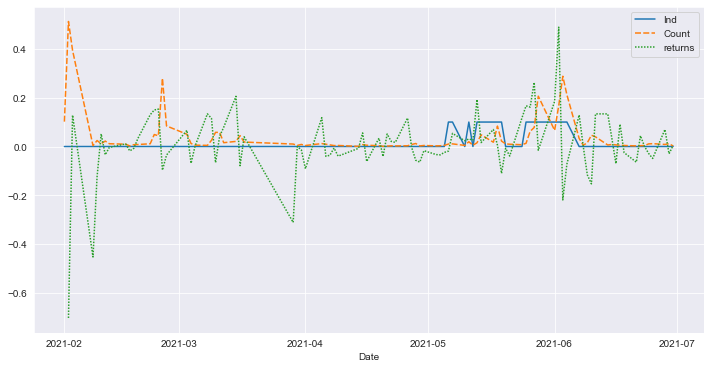

In [3]:
# Need to import functions to grab stock price data. 
import yfinance as yf
from yahoofinancials import YahooFinancials

# tsla_df = yf.download('TSLA', 
#                       start='2019-01-01', 
#                       end='2019-12-31', 
#                       progress=False)
# tsla_df

# Test run: visualizing normalized price, volume and count. 

# Build dataframe: 

def build_stock_df(ticker, start, end):
    df = yf.download(ticker,
                    start = start,
                    end = end,
                    progress = False)
    # Keep only adjusted close and volume 
    df = df.loc[:,['Adj Close','Volume' ]]
    df.rename(columns = {'Adj Close':'Close'},inplace=True)

    # Reindex reddit data
    reddit_df = get_ticker_ts(ticker, kind = 'mov')
    reddit_df.loc[:,'Time'] = pd.to_datetime(reddit_df.loc[:,'Time'])
    reddit_df.rename(columns = {'Time':'Date'},inplace = True)
    
    # This line gives the composed df. 
    df = pd.merge(df.reset_index(), reddit_df, how = 'outer', on = 'Date').dropna(how = 'any').set_index('Date')   
    
    return df


# Write normalization function. 


def norm(df, how = 'prob'):
    if how == 'prob':
        out = (df-df.mean())/df.std()
    if how == 'mm':
        out = (df-df.min())/(df.max()-df.min())
    return out

df = build_stock_df(ticker = 'AMC',
                    start = '2021-01-28',
                    end = '2021-07-1'
                   )


df.loc[:,'returns'] = (df.loc[:,'Close'] - df.loc[:,'Close'].shift(1))/df.loc[:,'Close']
print('return mean:',df.loc[:,'returns'].mean())
print('return std:',df.loc[:,'returns'].std())
df.loc[:,'D_Count'] = df.loc[:,'Count'].diff()
norm_df = norm(df, how = 'prob')


df.loc[:,'Count_MA'] = df.loc[:,'Count'].rolling(30).mean()
df.loc[:,'Ind'] = [0]*len(df)
Ind_filt = df.loc[:,'Count_MA']<df.loc[:,'Count']
df.loc[Ind_filt,'Ind'] = 0.1
df.loc[:,'Count'] = df.loc[:,'Count']/10000


plt.figure(figsize = [12,6])
sns.set_style('darkgrid')
# g = sns.lineplot(data = norm_df.loc[:,['Ind','returns']])

h = sns.lineplot(data = df.loc[:,['Ind','Count','returns']])
plt.show() 

df.loc[:,'t'] = np.arange(0,len(df),1)


# df.to_csv('C:\\Users\\linru\\Desktop\\test.csv')



In [55]:
# Investigation: do comparison study on type mov and type dis data. 
# Comparison study: 
path = os.getcwd().replace('code','raw')+'\\'+'collect'
dis = '\\'.join([path, 'dis'])
mov = '\\'.join([path, 'mov'])
dis_dates = [x.split('_')[0] for x in os.listdir(dis)]
mov_dates = [x.split('_')[0] for x in os.listdir(mov)]
dates = np.intersect1d(dis_dates,mov_dates)

# Build a list of dataframes which include dis and mov for dates. 
comp_dfs = {}
for d in dates: 
    file_name_dis = [x for x in os.listdir(dis) if d == x.split('_')[0]][0]
    file_name_mov = [x for x in os.listdir(mov) if d == x.split('_')[0]][0]
    file_dis = pd.read_csv('\\'.join([dis, file_name_dis])).loc[:,['Tickers','Count']]
    file_mov = pd.read_csv('\\'.join([mov, file_name_mov])).loc[:,['Tickers','Count']]
    # rename columns:
    file_dis.rename(columns = {'Count':'dis_Count'}, inplace = True)
    file_mov.rename(columns = {'Count':'mov_Count'}, inplace = True)
    file = pd.merge(file_dis, file_mov, how = 'outer', on = 'Tickers')
    file.dropna(how = 'any', inplace = True)
    comp_dfs[d] = file

# for k in comp_dfs.keys():
#     print(k,'\n')
    
#     print(comp_dfs[k].head(15),'\n')
# comp_dfs is a dictionary of all dates with dis and mov counts. 
# how to investigate correlation? 
# The hypothesis is that mov counts should have some effect on the stock performance on the day. 
# But should there exist a deterministic relationship betweeen mov and dis? 
# Consider that constructing a ordinal relationship ("top 10 stocks") would eliminate a lot of information in the data. 
# But does an ordinal relation admit a decision rule that helps us? 

# Closing this thread for now. This is not useful. 

In [2]:
# Investigation: write test strategy on monving average.  



def gen_Order_StratCountBollinger(df,budget, window = 5, std_scalar = 1, short_risk_scalar = 2):
    df = df.reset_index()
    df.loc[:,'Count_MA'] = df.loc[:,'Count'].shift(1).rolling(window).mean()
    df.loc[:,'Count_STD'] = df.loc[:,'Count'].shift(1).rolling(window).std()
    df.loc[:,'Count_normal'] = (df.loc[:,'Count'] - df.loc[:,'Count_MA'])/df.loc[:,'Count_STD']
    df.loc[:,'Count_Upper'] = df.loc[:,'Count_MA'] + df.loc[:,'Count_STD'] * short_risk_scalar * std_scalar
    df.loc[:,'Count_Lower'] = df.loc[:,'Count_MA'] - df.loc[:,'Count_STD'] * std_scalar
    
    # Maybe, make a count bollinger band strat? 
    
    df.loc[:,'Order'] = [0] * len(df)
    short_filt = df.loc[:,'Count_Upper']<df.loc[:,'Count']
    long_filt = df.loc[:,'Count_Lower']>df.loc[:,'Count']
    df.loc[short_filt,'Order'] = 1
    df.loc[long_filt, 'Order'] = -1
    
    return df

def gen_Order_StratCountBollinger_1(df,budget, window = 5, std_scalar = 1, short_risk_scalar = 2):
    df = df.reset_index()
    df.loc[:,'Count_MA'] = df.loc[:,'Count'].shift(1).rolling(window).mean()
    df.loc[:,'Count_STD'] = df.loc[:,'Count'].shift(1).rolling(window).std()
    df.loc[:,'Count_Upper'] = df.loc[:,'Count_MA'] + df.loc[:,'Count_STD'] * std_scalar
    df.loc[:,'Count_Lower'] = df.loc[:,'Count_MA'] - df.loc[:,'Count_STD'] * short_risk_scalar * std_scalar
    
    # Maybe, make a count bollinger band strat? 
    
    df.loc[:,'Order'] = [0] * len(df)
    up_filt = df.loc[:,'Count_Upper']<df.loc[:,'Count']
    down_filt = df.loc[:,'Count_Lower']>df.loc[:,'Count']
    df.loc[down_filt,'Order'] = -1
    df.loc[up_filt, 'Order'] = 1
    
    return df

def backtest_CountBollinger(df, budget, long_tol, short_tol): 
    
    df.loc[0,'Cash'] = budget
    
    for i in range(1,len(df)):
        if df.loc[i,'Order'] == 0:
#             df.loc[i+1,'Cash'] = df.loc[i,'Cash']
            df.loc[i,'Cash'] = df.loc[i-1,'Cash']
        elif df.loc[i,'Order'] == 1:
            df.loc[i,'Order'] = (df.loc[i-1,'Cash'] * long_tol) // df.loc[i,'Close']
            expense = -df.loc[i,'Close'] * df.loc[i,'Order']
#             df.loc[i+1,'Cash'] = expense + df.loc[i,'Cash']
            df.loc[i,'Cash'] = expense + df.loc[i-1,'Cash']

        elif df.loc[i,'Order'] == -1:
            df.loc[i,'Order'] = -(df.loc[i-1,'Cash'] * short_tol) // df.loc[i,'Close']
            expense = -df.loc[i,'Close'] * df.loc[i,'Order']
#             df.loc[i+1,'Cash'] = expense + df.loc[i,'Cash']
            df.loc[i,'Cash'] = expense + df.loc[i-1,'Cash']
    
    return df 

def backtest_CountBollinger_0(df, budget, long_tol, short_tol): 
    
    df.loc[0,'Cash'] = budget
    
    for i in range(1,len(df)):
        if df.loc[i,'Order'] == 0:
#             df.loc[i+1,'Cash'] = df.loc[i,'Cash']
            df.loc[i,'Cash'] = df.loc[i-1,'Cash']
            df.loc[i,'Position'] = df.loc[:i,'Order'].cumsum()[i]
            df.loc[i,'Value'] = df.loc[i,'Position'] * df.loc[i,'Close'] + df.loc[i,'Cash']
        elif df.loc[i,'Order'] == 1:
            df.loc[i,'Order'] = (df.loc[i-1,'Cash'] * long_tol) // df.loc[i,'Close']
            expense = -df.loc[i,'Close'] * df.loc[i,'Order']
#             df.loc[i+1,'Cash'] = expense + df.loc[i,'Cash']
            df.loc[i,'Cash'] = expense + df.loc[i-1,'Cash']
            df.loc[i,'Position'] = df.loc[:i,'Order'].cumsum()[i]
            df.loc[i,'Value'] = df.loc[i,'Position'] * df.loc[i,'Close'] + df.loc[i,'Cash']

        elif df.loc[i,'Order'] == -1:
            df.loc[i,'Order'] = -(df.loc[i-1,'Cash'] * short_tol) // df.loc[i,'Close']
            expense = -df.loc[i,'Close'] * df.loc[i,'Order']
#             df.loc[i+1,'Cash'] = expense + df.loc[i,'Cash']
            df.loc[i,'Cash'] = expense + df.loc[i-1,'Cash']
            df.loc[i,'Position'] = df.loc[:i,'Order'].cumsum()[i]
            df.loc[i,'Value'] = df.loc[i,'Position'] * df.loc[i,'Close'] + df.loc[i,'Cash']
    
    return df 

def main_StratCountBollinger(ticker, start, end, window, std_scalar, short_risk_scalar, budget, long_tol, short_tol):
    df = build_stock_df(ticker, start = start, end = end)
    df.loc[:,'returns'] = (df.loc[:,'Close'] - df.loc[:,'Close'].shift(1))/df.loc[:,'Close'] # gen returns 
    df = gen_Order_StratCountBollinger(df, budget, window, std_scalar, short_risk_scalar)
    df = backtest_CountBollinger(df, budget, long_tol, short_tol)
    df = df.dropna(how = 'any', subset = ['Count'])
    df.loc[:,'Position'] = df.loc[:,'Order'].cumsum()
    df.loc[:,'Value'] = df.loc[:,'Position'] * df.loc[:,'Close'] + df.loc[:,'Cash']
    
    df.set_index('Date')
#     print(df.head(50))
    
    # Visualization: 
    
    plt.figure(figsize = [12,6])
    sns.set_style('darkgrid') 
    norm_df = norm(df.loc[:,['Count','returns','Order']], how = 'prob')
#     norm_df = norm(df.loc[:,['returns','Count_normal']], how = 'prob')
    g1 = sns.lineplot(data = norm_df, palette = 'magma')
    plt.show()
    
    plt.figure(figsize = [12,6])
    sns.set_style('darkgrid')
    
    g2 = sns.lineplot(x = df.index, y = df.loc[:,'Value'])
    plt.show() 
    
    r = (df.loc[len(df)-1,'Value']-budget)/budget
    print('return in total is',
          r)
    
    return df.loc[:,'Value']

# New strategy: Sigmoid transformed rolling-t.  

def sigmoid(x):
    return (2/np.pi)*np.arctan((np.pi/2)*(x))

def gen_Order_StratCountSigmoid(df,budget, window = 5, std_scalar = 1, short_risk_scalar = 2):
    df = df.reset_index()
    df.loc[:,'Count_MA'] = df.loc[:,'Count'].shift(1).rolling(window).mean()
    df.loc[:,'Count_STD'] = df.loc[:,'Count'].shift(1).rolling(window).std()
    df.loc[:,'Count_Sigmoid'] = sigmoid((df.loc[:,'Count'] - df.loc[:,'Count_MA'])/df.loc[:,'Count_STD'])
    # transform positive t-Sigmoid to control for short risk. 
    #df.loc[df.loc[:,'Count_Sigmoid'] > 0,'Count_Sigmoid'] = df.loc[df.loc[:,'Count_Sigmoid'] > 0,'Count_Sigmoid']/short_risk_scalar
    df.loc[:,'Count_Upper'] = df.loc[:,'Count_MA'] + df.loc[:,'Count_STD'] *std_scalar
    df.loc[:,'Count_Lower'] = df.loc[:,'Count_MA'] - df.loc[:,'Count_STD'] *short_risk_scalar* std_scalar
    # Maybe, make a count bollinger band strat? 
    
    df.loc[:,'Order'] = [0] * len(df)
    long_filt = df.loc[:,'Count_Upper']<df.loc[:,'Count']
    short_filt = df.loc[:,'Count_Lower']>df.loc[:,'Count']
    df.loc[short_filt,'Order'] = -1
    df.loc[long_filt, 'Order'] = 1
    
    return df

def backtest_CountSigmoid(df, budget, long_tol, short_tol): 
    
    df.loc[0,'Cash'] = budget
    
    for i in range(1,len(df)):
        if df.loc[i,'Order'] == 0:
            df.loc[i,'Cash'] = df.loc[i-1,'Cash']
            df.loc[i,'Position'] = df.loc[:i,'Order'].cumsum()[i]
            df.loc[i,'Value'] = df.loc[i,'Position'] * df.loc[i,'Close'] + df.loc[i,'Cash']
            
        elif df.loc[i,'Order'] == 1:
            df.loc[i,'Order'] = (df.loc[i-1,'Cash'] * long_tol * np.abs(df.loc[i,'Count_Sigmoid'])) // df.loc[i,'Close']
            expense = -df.loc[i,'Close'] * df.loc[i,'Order']
            df.loc[i,'Cash'] = expense + df.loc[i-1,'Cash']
            df.loc[i,'Position'] = df.loc[:i,'Order'].cumsum()[i]
            df.loc[i,'Value'] = df.loc[i,'Position'] * df.loc[i,'Close'] + df.loc[i,'Cash']

        elif df.loc[i,'Order'] == -1:
            df.loc[i,'Order'] = -(df.loc[i-1,'Value'] * short_tol * np.abs(df.loc[i,'Count_Sigmoid'])) // df.loc[i,'Close']
            expense = -df.loc[i,'Close'] * df.loc[i,'Order']
            df.loc[i,'Cash'] = expense + df.loc[i-1,'Cash']
            df.loc[i,'Position'] = df.loc[:i,'Order'].cumsum()[i]
            df.loc[i,'Value'] = df.loc[i,'Position'] * df.loc[i,'Close'] + df.loc[i,'Cash']
    
    return df 

def main_StratCountSigmoid(ticker, start, end, window, std_scalar, short_risk_scalar, budget, long_tol, short_tol, 
                           viz = True):
    df = build_stock_df(ticker, start = start, end = end)
    df.loc[:,'returns'] = (df.loc[:,'Close'] - df.loc[:,'Close'].shift(1))/df.loc[:,'Close'] # gen returns 
    df = gen_Order_StratCountSigmoid(df, budget, window, std_scalar, short_risk_scalar)
    df = backtest_CountSigmoid(df, budget, long_tol, short_tol)
    df = df.dropna(how = 'any', subset = ['Count'])

    # df.loc[:,'Position'] = df.loc[:,'Order'].cumsum()
    # df.loc[:,'Value'] = df.loc[:,'Position'] * df.loc[:,'Close'] + df.loc[:,'Cash']

    df.loc[:,'Benchmark'] = df.loc[:,'Close'] * (budget // df.loc[0,'Close'])
    df.set_index('Date')
    #     print(df.head(50))
    # Visualization: 
    if viz == True:
        plt.figure(figsize = [12,6])
        sns.set_style('darkgrid') 
        norm_df = norm(df.loc[:,['Count','returns','Order']], how = 'prob')
        #     norm_df = norm(df.loc[:,['returns','Count_normal']], how = 'prob')
        g1 = sns.lineplot(data = norm_df, palette = 'magma')
        plt.show()

        plt.figure(figsize = [12,6])
        sns.set_style('darkgrid')

        g2 = sns.lineplot(data = df.loc[:,['Value','Benchmark']])
        plt.show() 
    
    # Compute statistics
    
    r = (df.loc[len(df)-1,'Value']-budget)/budget
    print('return in total is',
          r)
    df.loc[:,'Value_return'] = (df.loc[:,'Value'] - df.loc[:,'Value'].shift(1))/df.loc[:,'Value'].shift(1)
    df.loc[:,'Bench_return'] = (df.loc[:,'Benchmark'] - df.loc[:,'Benchmark'].shift(1))/df.loc[:,'Benchmark'].shift(1)
    value_sharpe = df.loc[:,'Value_return'].mean()/df.loc[:,'Value_return'].std()
    benchmark_sharpe = df.loc[:,'Bench_return'].mean()/df.loc[:,'Bench_return'].std()
    print('Portfolio value Sharpe ratio is',value_sharpe)
    print('Benchmark value Sharpe ratio is',benchmark_sharpe)
    
    return value_sharpe

# ticker = 'PLTR'
# start = '2021-01-01'
# end = '2021-07-13'
# window = 5
# std_scalar = 1
# short_risk_scalar = 1
# budget = 10000
# long_tol = 0.5
# short_tol = 0.1

# print(df.loc[:,['Count_Upper','Count_Lower','Count_Sigmoid','Cash','Position','Order',
#                'Count_MA','Count_STD','Count']].tail(50))


# ticker = 'SPCE'
# start = '2021-04-01'
# end = '2021-07-13'
# window = 5
# std_scalar = 1
# short_risk_scalar = 1
# budget = 10000
# long_tol = 0.1
# short_tol = 0.02
  

# main_StratCountMA(ticker = 'CLOV',
#                     start = '2021-01-28',
#                     end = '2021-07-1',
#                  window = 21,
#                  streak = 2,
#                  budget = 10000)
# ticker, start, end, window, scalar, budget, long_tol, short_tol

###
# Unmute these to see performance
###

# main_StratCountBollinger(ticker = 'PLTR',
#                     start = '2021-01-1',
#                     end = '2021-07-13',
#                  window = 5,
#                  std_scalar = 0,
#                 short_risk_scalar = 2,
#                  budget = 10000,
#                         long_tol = 0.1,
#                         short_tol = 0
#                         )




# main_StratCountSigmoid(ticker = 'GME',
#                     start = '2021-01-1',
#                     end = '2021-07-13',
#                  window = 5,
#                  std_scalar = 1,
#                 short_risk_scalar = 1,
#                  budget = 10000,
#                         long_tol = 1,
#                         short_tol = 1
#                         )

data = []
# fig,axes = plt.subplots(2,3, sharex = False, figsize = [18,10])
freq = 0.01
# for w in range(3,9):
result = []
#     for l in np.arange(0,1.02,0.02):
#         for s in np.arange(0,1.02,0.02):
#             print('long tolerance is',l)
#             print('short tolerance is',s)
#             r = main_StratCountSigmoid(ticker = 'GME',
#                         start = '2021-03-1',
#                         end = '2021-03-20',
#                      window = w,
#                      std_scalar = 1,
#                     short_risk_scalar = 1,
#                      budget = 10000,
#                             long_tol = l,
#                             short_tol = s,
#                                        viz = False
#                             )
#             result.append([l, s, r])

#     print(np.array(result))
#     df = pd.DataFrame(result)
#     df.rename(columns = {0:'long_tol',1:'short_tol',2:'sharpe'}, inplace = True)

#     df.loc[:,'long_tol'] = df.loc[:,'long_tol'].apply(lambda x: str(round(x,2)))
#     df.loc[:,'short_tol'] = df.loc[:,'short_tol'].apply(lambda x: str(round(x,2)))
#     heat = pd.pivot_table(data = df, index = 'long_tol', columns = 'short_tol', values = 'sharpe')
#     SPCE_long_short_grid_data_w3_11.append(heat)
#     plt.figure(figsize = [10,8])
#     sns.set_style('ticks')
#     sns.heatmap(ax = axes[(w-3)//4,(w-3)%4],data = heat, fmt = 'f', vmin = -0.15, vmax = 0.25)

for std in np.arange(0,2+freq,freq):
    for short in np.arange(0,2+freq,freq):
        print('std scalar is',std)
        print('short risk scalar is',short)
        r = main_StratCountSigmoid(ticker = 'AMC',
                    start = '2021-03-1',
                    end = '2021-06-1',
                 window = 5,
                 std_scalar = std,
                short_risk_scalar = short,
                 budget = 10000,
                        long_tol = 0.5,
                        short_tol = 0.3,
                                   viz = False
                        )
        result.append([std, short, r])

print(np.array(result))
df = pd.DataFrame(result)
df.rename(columns = {0:'std',1:'short',2:'sharpe'}, inplace = True)

df.loc[:,'std'] = df.loc[:,'std'].apply(lambda x: str(round(x,2)))
df.loc[:,'short'] = df.loc[:,'short'].apply(lambda x: str(round(x,2)))
heat = pd.pivot_table(data = df, index = 'std', columns = 'short', values = 'sharpe')
data.append(heat)
plt.figure(figsize = [10,8]) 
sns.set_style('ticks')
sns.heatmap(data = heat, fmt = 'f', vmin = 0, vmax = 0.4)
# axes[(w-3)//3,(w-3)%3].set_title('Window Size '+str(w))
plt.show()
# print(GME_long_short_grid_data_w5)
# p = np.arange(0,0.3,0.02)
# param = np.zeros([len(p),len(p)])
# print(param)
# for l in range(len(p)):
#     for s in range(len(p)):
#         r = opt_CountBollinger(ticker = 'PLTR',
#                         start = '2021-01-1',
#                         end = '2021-07-13',
#                      window = 5,
#                      std_scalar = 1,
#                     short_risk_scalar = 1,
#                      budget = 10000,
#                             long_tol = p[l],
#                             short_tol = p[s]
#                             )
#         param[l,s] = r

# print(param)



std scalar is 0.0
short risk scalar is 0.0
return in total is 0.4195330659866333
Portfolio value Sharpe ratio is 0.15583171176818095
Benchmark value Sharpe ratio is 0.2604736672206416
std scalar is 0.0
short risk scalar is 0.01
return in total is 0.4195330659866333
Portfolio value Sharpe ratio is 0.15583171176818095
Benchmark value Sharpe ratio is 0.2604736672206416
std scalar is 0.0
short risk scalar is 0.02
return in total is 0.4195330659866333
Portfolio value Sharpe ratio is 0.15583171176818095
Benchmark value Sharpe ratio is 0.2604736672206416
std scalar is 0.0
short risk scalar is 0.03
return in total is 0.4195330659866333
Portfolio value Sharpe ratio is 0.15583171176818095
Benchmark value Sharpe ratio is 0.2604736672206416
std scalar is 0.0
short risk scalar is 0.04
return in total is 0.4195330659866333
Portfolio value Sharpe ratio is 0.15583171176818095
Benchmark value Sharpe ratio is 0.2604736672206416
std scalar is 0.0
short risk scalar is 0.05


KeyboardInterrupt: 

In [203]:
for i in range(len(data)):
    data[i].to_csv('GME_3.1-3.20_std_short_grid_data_long0.5_short0.5_w'+str(i+3)+'.csv')

In [186]:
for i in range(len(SPCE_long_short_grid_data_w3_11)):
    SPCE_long_short_grid_data_w3_11[i].to_csv('SPCE_3.1-5.1_long_short_grid_data_std2_short1.2_w'+str(i+3)+'.csv')

<AxesSubplot:xlabel='short_tol', ylabel='long_tol'>

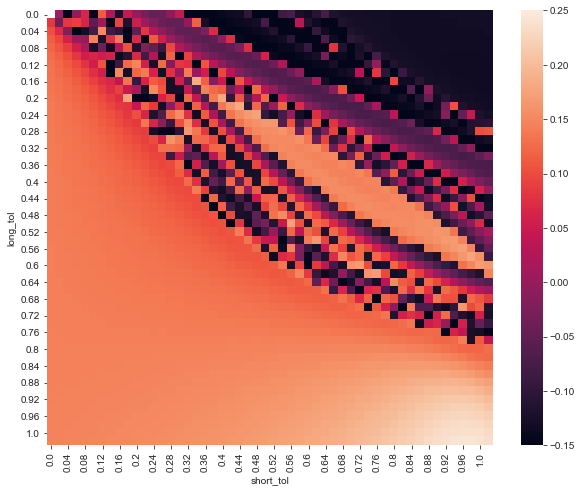

In [158]:
plt.figure(figsize = [10,8])
sns.set_style('ticks')
sns.heatmap(data = heat, fmt = 'f', vmin = -0.15, vmax = 0.25)

In [1]:
def download(ticker, start, end, today = True):
    temp_path = os.getcwd().replace('code','temp')
    if today == True:
        today = datetime.datetime.today()
        end = '-'.join([str(today.year),str(today.month),str(today.day)])
    df = build_stock_df(ticker, start ,end)
    df.to_csv('\\'.join([temp_path,'local.csv']))
    return temp_path
    
def CV_CountSigmoid(ticker, start, end, budget, today, W, N, viz):
    # Download universe only once, maximum scope. 
    temp_path = download(ticker,start, end, today)
    universe = pd.read_csv('\\'.join([temp_path,'local.csv']))
    U = len(universe)
    
    # Initialize 
    OUT = []
    universe.loc[:,'Order'] = [0] * len(universe)
    universe.loc[0,'Cash'] = budget
    
    
    # Initialize parameter list
    Param_list = []
    for i in range(U-N-2*W): # from day (n+w+1) to day U:
        # Use data from past (n+w) days. 
        
        # 1. Train on subuniverse. 
            # Write me: 
            #    #### THIS IS THE BIG FISH ####    # 
            # Opt_CountSigmoid() 
            #    #### THIS IS THE BIG FISH ####    # 
            # return a list of parameters. 
            # Record. 
            
        sub_universe = universe.loc[i:2*W+N-2+i,:]
        
        param_dict = Opt_CountSigmoid(df_0 = sub_universe, 
                                   budget = budget,
                                   freq_std_short = 0.1,
                                   freq_tol = 0.1,
                                   std_short_lim = [3,2],
                                   W = W, 
                                     progress_ind = True)
        Param_list.append(param_dict)   
        
        print('Training ', str(round((i+1)/(U-N-2*W)*100,2))+'% ',
             'done.',
              sep='')
        print(param_dict)
    
    # 2. Trade on (df.loc[N+W+i,:]), 
    # Use data: df.loc[N+1+i:N+W+i,:]
    # obtain a order number. (on basis of gen_Order and backtest_)
    # Record. 
    
    for i in range(U-N-2*W):
        # CHECK INDEX # CHECK INDEX# CHECK INDEX# CHECK INDEX# CHECK INDEX# CHECK INDEX# CHECK INDEX# CHECK INDEX
        param_dict = Param_list[i]
        window = universe.loc[W+N+i:2*W+N-1+i,:]
        Count_MA = window.loc[:,'Count'].mean()
        Count_STD = window.loc[:,'Count'].std()
        Count = universe.loc[N+2*W+i,'Count']
        universe.loc[N+2*W+i,'Count_Sigmoid'] = sigmoid( (Count - Count_MA) / Count_STD )
        Count_Upper = Count_MA + Count_STD * param_dict['std']
        Count_Lower = Count_MA - Count_STD * param_dict['std'] * param_dict['short']
        
        universe.loc[N+2*W+i,'short_tol'] = param_dict['short_tol']
        universe.loc[N+2*W+i,'long_tol'] = param_dict['long_tol']    
        
        # 2.1 Make order decisions. 
        
        if Count_Upper < Count:
            universe.loc[N+2*W+i,'Order'] = 1
            
        elif Count_Lower > Count:
            universe.loc[N+2*W+i,'Order'] = -1
            
        
    # 2.2 Edit order decisions. 
    
    for i in range(1,len(universe)):
        
        if universe.loc[i,'Order'] == 0:
            universe.loc[i,'Cash'] = universe.loc[i-1,'Cash']
            universe.loc[i,'Position'] = universe.loc[:i,'Order'].cumsum()[i]
            universe.loc[i,'Value'] = universe.loc[i,'Position'] * universe.loc[i,'Close'] + universe.loc[i,'Cash']
            
        elif universe.loc[i,'Order'] == 1:
            universe.loc[i,'Order'] = (universe.loc[i-1,'Cash'] * universe.loc[i,'long_tol'] * np.abs(universe.loc[i,'Count_Sigmoid'])) // \
                                        universe.loc[i,'Close']
            expense = -universe.loc[i,'Close'] * universe.loc[i,'Order']
            universe.loc[i,'Cash'] = expense + universe.loc[i-1,'Cash']
            universe.loc[i,'Position'] = universe.loc[:i,'Order'].cumsum()[i]
            universe.loc[i,'Value'] = universe.loc[i,'Position'] * universe.loc[i,'Close'] + universe.loc[i,'Cash']

        elif universe.loc[i,'Order'] == -1:
            universe.loc[i,'Order'] = -(universe.loc[i-1,'Value'] * universe.loc[i,'short_tol'] * np.abs(universe.loc[i,'Count_Sigmoid'])) // \
                                        universe.loc[i,'Close']
            expense = -universe.loc[i,'Close'] * universe.loc[i,'Order']
            universe.loc[i,'Cash'] = expense + universe.loc[i-1,'Cash']
            universe.loc[i,'Position'] = universe.loc[:i,'Order'].cumsum()[i]
            universe.loc[i,'Value'] = universe.loc[i,'Position'] * universe.loc[i,'Close'] + universe.loc[i,'Cash']
    
    print(universe)

    # 3. Build df (on basis of second half of main_)
        # Imbue benchmark and compute portfolio value 
        # output Sharpe. 
        
    # first trading day index W+N. 
    universe.loc[:,'Benchmark'] = universe.loc[:,'Close'] * (budget // universe.loc[N+2*W,'Close'])
    universe.loc[:,'Value_return'] = (universe.loc[:,'Value'] - universe.loc[:,'Value'].shift(1))/universe.loc[:,'Value'].shift(1)
    universe.loc[:,'Bench_return'] = (universe.loc[:,'Benchmark'] - universe.loc[:,'Benchmark'].shift(1))/universe.loc[:,'Benchmark'].shift(1)
    universe.loc[:,'returns'] = (universe.loc[:,'Close'] - universe.loc[:,'Close'].shift(1))/universe.loc[:,'Close']
    value_sharpe = universe.loc[:,'Value_return'].mean()/universe.loc[:,'Value_return'].std()
    benchmark_sharpe = universe.loc[:,'Bench_return'].mean()/universe.loc[:,'Bench_return'].std()
    print('Portfolio value Sharpe ratio is',value_sharpe)
    print('Benchmark value Sharpe ratio is',benchmark_sharpe) 
    
    # 4. Visualization: 
    if viz == True:
        plt.figure(figsize = [12,6])
        sns.set_style('darkgrid') 
        norm_df = norm(universe.loc[:,['Count','returns','Order']], how = 'prob')
        #     norm_df = norm(df.loc[:,['returns','Count_normal']], how = 'prob')
        g1 = sns.lineplot(data = norm_df, palette = 'magma')
        plt.show()

        plt.figure(figsize = [12,6])
        sns.set_style('darkgrid')

        g2 = sns.lineplot(data = universe.loc[:,['Value','Benchmark']])
        plt.show() 
    
    
            
        
        
        
    
    return # OUTPUT: a LIST of CV measures, length = (U-N-W)
    
# Maybe can add in optimization for W too. 
def Opt_CountSigmoid(df_0, budget, freq_std_short, freq_tol, std_short_lim, W, progress_ind = True):
    # What to do here: 
    # 1. Run grid search on df 
    # 1.1 std-short_risk scalar search. 
    std_lim, short_lim = std_short_lim[0], std_short_lim[1]
    result = []
    for std in np.arange(freq_std_short,std_lim+freq_std_short,freq_std_short):
        for short in np.arange(freq_std_short,short_lim+freq_std_short,freq_std_short):
            
            df = gen_Order_StratCountSigmoid(df = df_0, budget = budget,window = W, 
                                             std_scalar = std, short_risk_scalar = short)
            df = backtest_CountSigmoid(df = df, budget = budget, long_tol = 1, short_tol = 1)    
#             df = df.dropna(how = 'any', subset = ['Count'])
            df = df.dropna(how = 'any')
            df.loc[:,'Value_return'] = (df.loc[:,'Value'] - df.loc[:,'Value'].shift(1))/df.loc[:,'Value'].shift(1)
            if df.loc[:,'Value_return'].std() != 0:
                value_sharpe = df.loc[:,'Value_return'].mean()/df.loc[:,'Value_return'].std()
            else:
                value_sharpe = 0
            result.append([std, short, value_sharpe])
            
            # indicating progress: 
            if progress_ind == True:
                print(df)
                progress = (std-freq_std_short)/std_lim + short/short_lim * freq_std_short/std_lim
    #             progress = (std)/std_lim + (short+freq_std_short)/short_lim * freq_std_short/std_lim
                print('std-short_risk scalar search ',round(progress * 100,3),'% done.',sep = ''
                     )

    result = pd.DataFrame(result, columns = ['std','short','sharpe'])
    num_cand = int(len(result)*0.01)
    top = result.sort_values(by = 'sharpe',ascending = False).head(num_cand)
    std_param = top.loc[:,'std'].mode().median()
    short_param = top.loc[:,'short'].mode().median()

    # 1.2 long-short_tol search
    result = []
    for l in np.arange(freq_tol,1+freq_tol, freq_tol):
        for s in np.arange(freq_tol,1+freq_tol, freq_tol):

            df = gen_Order_StratCountSigmoid(df = df_0, budget = budget,window = W, 
                                             std_scalar = std_param, short_risk_scalar = short_param)
            df = backtest_CountSigmoid(df = df, budget = budget, long_tol = l, short_tol = s)    
#             print(df)
            df = df.dropna(how = 'any', subset = ['Count'])
            df.loc[:,'Value_return'] = (df.loc[:,'Value'] - df.loc[:,'Value'].shift(1))/df.loc[:,'Value'].shift(1)
            if df.loc[:,'Value_return'].std() != 0:
                value_sharpe = df.loc[:,'Value_return'].mean()/df.loc[:,'Value_return'].std()
            else:
                value_sharpe = 0
            result.append([l, s, value_sharpe])
            
            # indicating progress: 
            if progress_ind == True:
                print(df)
                progress = (l-freq_tol)/1 + s/1 * freq_tol/1
    #             progress = (std)/std_lim + (short+freq_std_short)/short_lim * freq_std_short/std_lim
                print('long-short tolerance search ',round(progress * 100,3),'% done.',sep = ''
                     )
    result = pd.DataFrame(result, columns = ['long_tol','short_tol','sharpe'])
    num_cand = int(len(result)*0.01)
    top = result.sort_values(by = 'sharpe',ascending = False).head(num_cand)
    long_tol_param = top.loc[:,'long_tol'].mode().median()
    short_tol_param = top.loc[:,'short_tol'].mode().median()
    
    param_dict = {'std':std_param, 'short':short_param, 
                  'long_tol':long_tol_param, 
                  'short_tol':short_tol_param}
    
    # 2. Add in running indicators, show progress. 
    
    return param_dict
            
CV_CountSigmoid(ticker = 'MVIS',start ='2021-1-1', end = '2021-5-1', budget = 10000,
                today = False, W = 5, N = 5, viz = True)          
            
    
    

NameError: name 'os' is not defined

In [328]:
# searching for "best" param:
path = r'C:\Users\linru\Desktop\Research\Jul. 19 Viz\Data'
files = [x for x in os.listdir(path) if 'GME' in x]
data = []
for f in files:
    data.append(pd.read_csv('\\'.join([path,f])))


df = pd.melt(data[0], id_vars = 'long_tol',
        value_vars = list(data[0].columns[1:]),
        var_name = 'short_tol',
        value_name = 'sharpe'
       )
print(df)
num_cand = int(len(df)*0.01)
top = df.sort_values(by = 'sharpe',ascending=False).head(i)
print(top.loc[:,'long_tol'].mode().median())
print(top.loc[:,'short_tol'].mode().median())

        

      long_tol short_tol    sharpe
0         0.00       0.0       NaN
1         0.02       0.0  0.084073
2         0.04       0.0  0.104278
3         0.06       0.0  0.115086
4         0.08       0.0  0.121618
...        ...       ...       ...
2596      0.92       1.0  0.206926
2597      0.94       1.0  0.216551
2598      0.96       1.0  0.224717
2599      0.98       1.0  0.232062
2600      1.00       1.0  0.237561

[2601 rows x 3 columns]
1.0
0.96


In [6]:
%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>

In [56]:
df = pd.DataFrame({'A':np.arange(1,101,1)})
u = len(df)
n = 5
w = 2
for i in range(u-2*w-n):
    print('\ntrain')
    print(df.loc[i:2*w+n-2+i])
    print('\nwindow')
    print(df.loc[w+n+i:2*w+n-1+i])
    print('\ntrade')
    print(df.loc[2*w+n+i,:])
print(df)


train
   A
0  1
1  2
2  3
3  4
4  5
5  6
6  7
7  8

window
   A
7  8
8  9

trade
A    10
Name: 9, dtype: int32

train
   A
1  2
2  3
3  4
4  5
5  6
6  7
7  8
8  9

window
    A
8   9
9  10

trade
A    11
Name: 10, dtype: int32

train
    A
2   3
3   4
4   5
5   6
6   7
7   8
8   9
9  10

window
     A
9   10
10  11

trade
A    12
Name: 11, dtype: int32

train
     A
3    4
4    5
5    6
6    7
7    8
8    9
9   10
10  11

window
     A
10  11
11  12

trade
A    13
Name: 12, dtype: int32

train
     A
4    5
5    6
6    7
7    8
8    9
9   10
10  11
11  12

window
     A
11  12
12  13

trade
A    14
Name: 13, dtype: int32

train
     A
5    6
6    7
7    8
8    9
9   10
10  11
11  12
12  13

window
     A
12  13
13  14

trade
A    15
Name: 14, dtype: int32

train
     A
6    7
7    8
8    9
9   10
10  11
11  12
12  13
13  14

window
     A
13  14
14  15

trade
A    16
Name: 15, dtype: int32

train
     A
7    8
8    9
9   10
10  11
11  12
12  13
13  14
14  15

window
     A
14  15
15  